In [1]:
import pandas as pd
import numpy as np

train_df=pd.read_csv('../data/train.csv')

print("Shape of dataset:", train_df.shape)
train_df.head()

Shape of dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_df.info()

train_df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


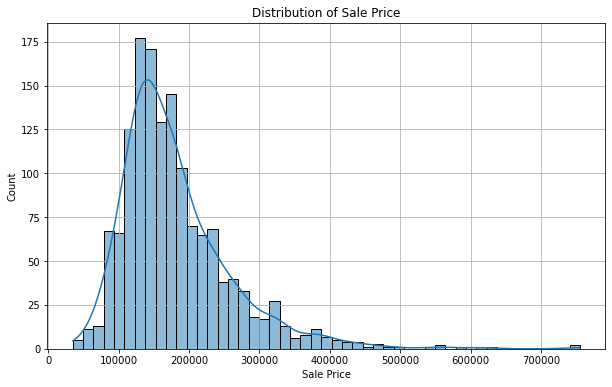

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [7]:
numeric_df=train_df.select_dtypes(include=[np.number])
correlation=numeric_df.corr()

top_corr=correlation['SalePrice'].sort_values(ascending=False).head(10)

print("Top 10 correlations with SalePrice:")
print(top_corr)

Top 10 correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


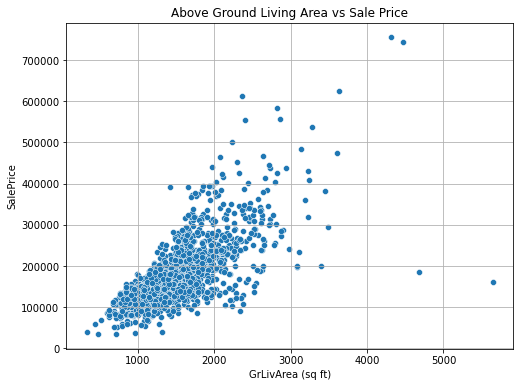

In [8]:
#Visualizing GrLivArea vs SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

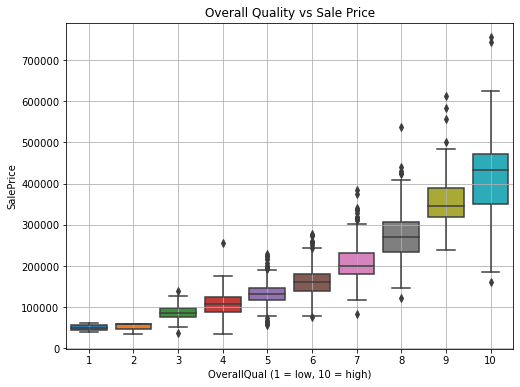

In [9]:
#Visualizing OverallQual vs SalePrice
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('OverallQual (1 = low, 10 = high)')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

In [11]:
#Total and percentage of missing values
missing=train_df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)

missing_percent=(missing/len(train_df))*100

#Combine into one table
missing_df=pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df.head(10)

,Missing Values,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [14]:
#Drop columns with more than 40% missing values
threshold=40
cols_to_drop=missing_df[missing_df['Percent']>threshold].index
train_df=train_df.drop(columns=[col for col in cols_to_drop if col in train_df.columns])

print("Dropped columns:", list(cols_to_drop))

Dropped columns: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


In [15]:
#Fill missing numeric columns with median
numeric_cols=train_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if train_df[col].isnull().sum()>0:
        train_df[col]=train_df[col].fillna(train_df[col].median())

In [17]:
#Fill missing categorical columns with mode (most frequent value)
cat_cols=train_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if train_df[col].isnull().sum()>0:
        train_df[col]=train_df[col].fillna(train_df[col].mode([0]))

In [18]:
#Checking if anything is still missing
train_df.isnull().sum().sum()

520

In [19]:
#Check which columns still have missing values
train_df.isnull().sum()[train_df.isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [21]:
#Fill "no basement" with "None"
bsmt_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train_df[bsmt_cols]=train_df[bsmt_cols].fillna('None')

#Fill "no garage" with "None"
garage_cols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train_df[garage_cols]=train_df[garage_cols].fillna('None')

#Fill MasVnrType with "None"
train_df['MasVnrType']=train_df['MasVnrType'].fillna('None')

#Fill Electrical with mode
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [22]:
#Checking if any missing values are remaining unhandled
train_df.isnull().sum().sum()

0

In [23]:
#Target Variable
y=train_df['SalePrice']

#Drop columns we don't want to use as features
X=train_df.drop(columns=['SalePrice', 'Id'])

In [24]:
#One-hot encode categorical columns
X=pd.get_dummies(X)

In [25]:
#Check dimensions after encoding
print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:",y.shape)

Shape of feature matrix X: (1460, 279)
Shape of target vector y: (1460,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#80% training, 20% testing
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [28]:
#Create the model
model=LinearRegression()

#Train it on training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
#Predict sale prices for test set
y_pred=model.predict(X_test)

In [31]:
#Evaluating the model
#Root Mean Squared Error
rmse=mean_squared_error(y_test, y_pred, squared=False)

#R-squared score
r2=r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error: 29529.90
R^2 Score: 0.89


In [33]:
#Now we are Log-transforming the SalePrice as it is right-skewed and poorly fits the data
#Log-transform SalePrice
y_log=np.log1p(y)

#Train-test split again nut with y_log this time
X_train, X_test, y_train, y_test= train_test_split(
    X,y_log, test_size=0.2, random_state=42
)

#Train the linear regression model again
model=LinearRegression()
model.fit(X_train, y_train)

#Predict on the test set(still in log scale)
y_pred_log=model.predict(X_test)

#Convert predictions back to original scale
#Reverse log transformation to get actual price
y_pred=np.expm1(y_pred_log)
y_actual=np.expm1(y_test)

#Evaluate performance again
rmse=mean_squared_error(y_actual, y_pred, squared=False)
r2=r2_score(y_actual, y_pred)

print(f"Root Mean Squared Error (after log transform): {rmse:.2f}")
print(f"R^2 Score (after log transform): {r2:.2f}")

Root Mean Squared Error (after log transform): 22935.84
R^2 Score (after log transform): 0.93


### Visualizing Model Performance

We now visualize how well the Linear Regression model performs after log transformation.

- **Actual vs Predicted SalePrice**: Points close to the red line indicate accurate predictions.
- **Prediction Errors (Residuals)**: Shows how much the model under- or over-estimates sale prices.


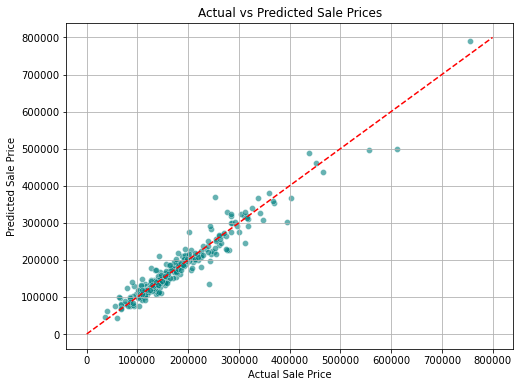

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=np.expm1(y_test), y=np.expm1(y_pred_log), alpha=0.6, color="teal")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([0, 800000], [0,800000], color="red", linestyle='--') #perfect prediction line
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

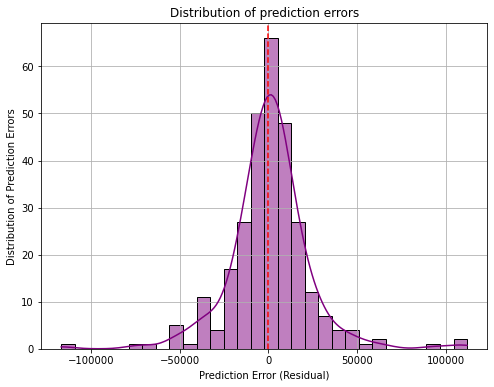

In [35]:
#Visualizing residuals
residuals=np.expm1(y_test) - np.expm1(y_pred_log)

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Distribution of Prediction Errors")
plt.title("Distribution of prediction errors")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.savefig('residuals.png')
plt.show()